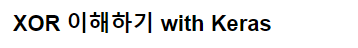

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [0,
          1,
          1,
          0]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

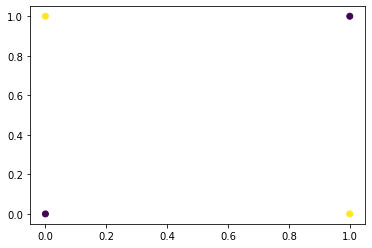

In [3]:
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import models

In [5]:
model = models.Sequential()
model.add(layers.Dense(2, input_dim=2))
model.add(layers.Activation('tanh'))
#model.add(layers.Dense(2)) # comment out
#model.add(layers.Activation('tanh')) # comment out
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

In [6]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


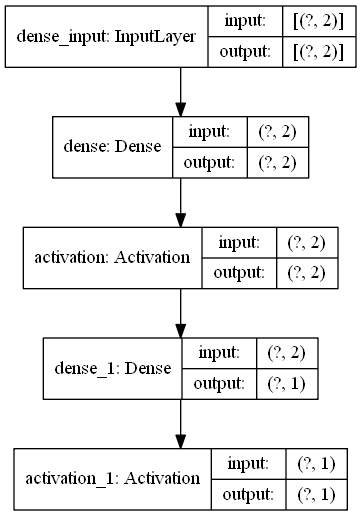

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_xor.png', show_shapes=True)

In [9]:
history = model.fit(x_data, y_data,  batch_size=1, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7647 - accuracy: 0.5000
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7587 - accuracy: 0.5000
Epoch 3/500
4/4 [==============================] - 0s 1ms/step - loss: 0.7521 - accuracy: 0.5000
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7480 - accuracy: 0.7500
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 0.7441 - accuracy: 0.7500
Epoch 6/500
4/4 [==============================] - 0s 1ms/step - loss: 0.7437 - accuracy: 0.5000
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7398 - accuracy: 0.7500
Epoch 8/500
4/4 [==============================] - 0s 1ms/step - loss: 0.7383 - accuracy: 0.5000
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7378 - accuracy: 0.5000
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7351 - accuracy: 0.5000
Epoch 11/500
4/4 [===========

Text(0.5, 0, 'epoch')

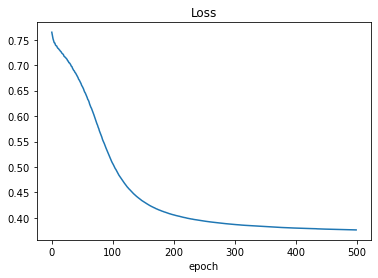

In [10]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

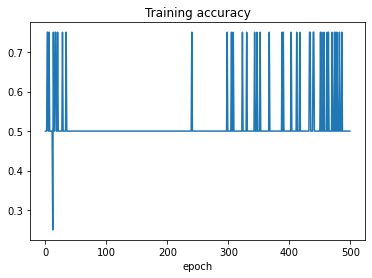

In [11]:
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('epoch')

In [12]:
hypothesis = model.predict(x_data)
print(hypothesis)

[[0.01088145]
 [0.98771787]
 [0.49918506]
 [0.5074215 ]]


In [13]:
predicted = hypothesis > 0.5
print(predicted)

[[False]
 [ True]
 [False]
 [ True]]


<h3> Think : XOR분류에서 정확도 75의 의미 ? </h3>

XOR게이트의 경우 2차원 평면에 해당 게이트를 시각화하면 알 수 있듯, 선 하나만 가지고 해당 점을 구분하기는 불가능하다.  
일종의 선형 분류기인 퍼셉트론도 마찬가지로 1개만 가지고는 XOR게이트를 구별할 수 없다.   
이에 우리는 퍼셉트론을 여러 층으로 쌓아 다층 퍼셉트론을 활용하는데,   
2차원 평면에서 한 개의 분류기만 가지고 시도하지 못했던 일을 3차원 공간으로 차원을 증대시킨 다음에 2개의 분류기로 분류해보자고 생각하면 이해가 쉬웠다.  
다층 퍼셉트론을 이용해서 학습을 하는 경우, 각각의 퍼셉트론은 가중치와 편향을 학습하게 되는데, 이 학습 도중에 정확도가 변화하게 된다.  
제일 초기에는 50%(이진 분류이므로) 다음은 모델이 절반 정도의 학습이 완료되었다면 75%, 학습이 완료되었다면 100%의 정확도를 보여주게 될 것이다.  
75%정확도는 학습은 이루어지고 있지만 학습이 아직 덜 된 상태를 의미한다고 볼 수 있다.  